In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

#imported All the Necessay Libraries

In [2]:
#this files is fresh data , i just downloaded, so let read Our File

df=pd.read_csv(r'C:\\Users\\HP\Downloads\archive (5)\netflix_titles.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [3]:
#checking the quantity or percentage of our missing data

df.isnull().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [5]:
#dealng with missing Data

for_director=df['director'].dropna().tolist()
df['director']=df['director'].fillna(pd.Series(np.random.choice(for_director,size=len(df.index))))

for_cast=df['cast'].dropna().tolist()
df['cast']=df['cast'].fillna(pd.Series(np.random.choice(for_cast,size=len(df.index))))

for_country=df['country'].dropna().tolist()
df['country']=df['country'].fillna(pd.Series(np.random.choice(for_country,size=len(df.index))))

for_duration=df['duration'].dropna().tolist()
df['duration']=df['duration'].fillna(pd.Series(np.random.choice(for_duration,size=len(df.index))))

for_rating=df['rating'].dropna().tolist()
df['rating']=df['rating'].fillna(pd.Series(np.random.choice(for_rating,size=len(df.index))))

In [6]:
#This is Date Format,i decicde to change the look using the conventiona method which if 'ffill'

df['date_added']=df['date_added'].fillna(method='ffill')

In [7]:
#Missing Data Is Handle with care👌👌👌

df[df.isnull().any(axis=1)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [8]:
#For Better Data Analysis we need to get out some thing fro our date_added date columns!!!


#getting the month Name
df['Month_Name']=pd.DatetimeIndex(df['date_added']).month_name()

#getting Days of weeks name from the date_added column
df['Days_Name']=pd.DatetimeIndex(df['date_added']).day_name()

#Getting the Year from the date_added columns
df['Years']=pd.DatetimeIndex(df['date_added']).year

In [9]:
#let view our Table

df.tail(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month_Name,Days_Name,Years
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November,Friday,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,Saturday,2020
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,March,Saturday,2019


In [10]:
#let drop the date_added columns

df=df.drop('date_added',axis='columns')

# EDA

Text(0.5, 1.0, 'Movie_categorys')

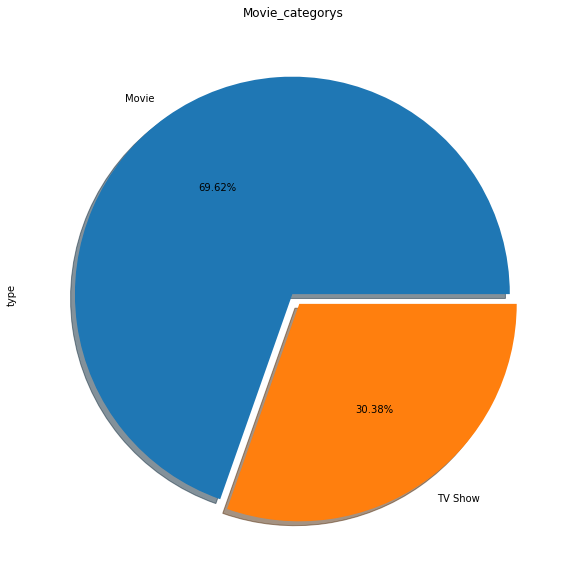

In [11]:
#Plotting for to see where what our type columns is made up of  ?? 

df['type'].value_counts().plot.pie(figsize=(12,10),shadow=True,explode=[0.005,0.05],autopct='%1.2f%%').set_title('Movie_categorys')

MOVIE HAVE MORE VIEWS THAN TVSHOWS.

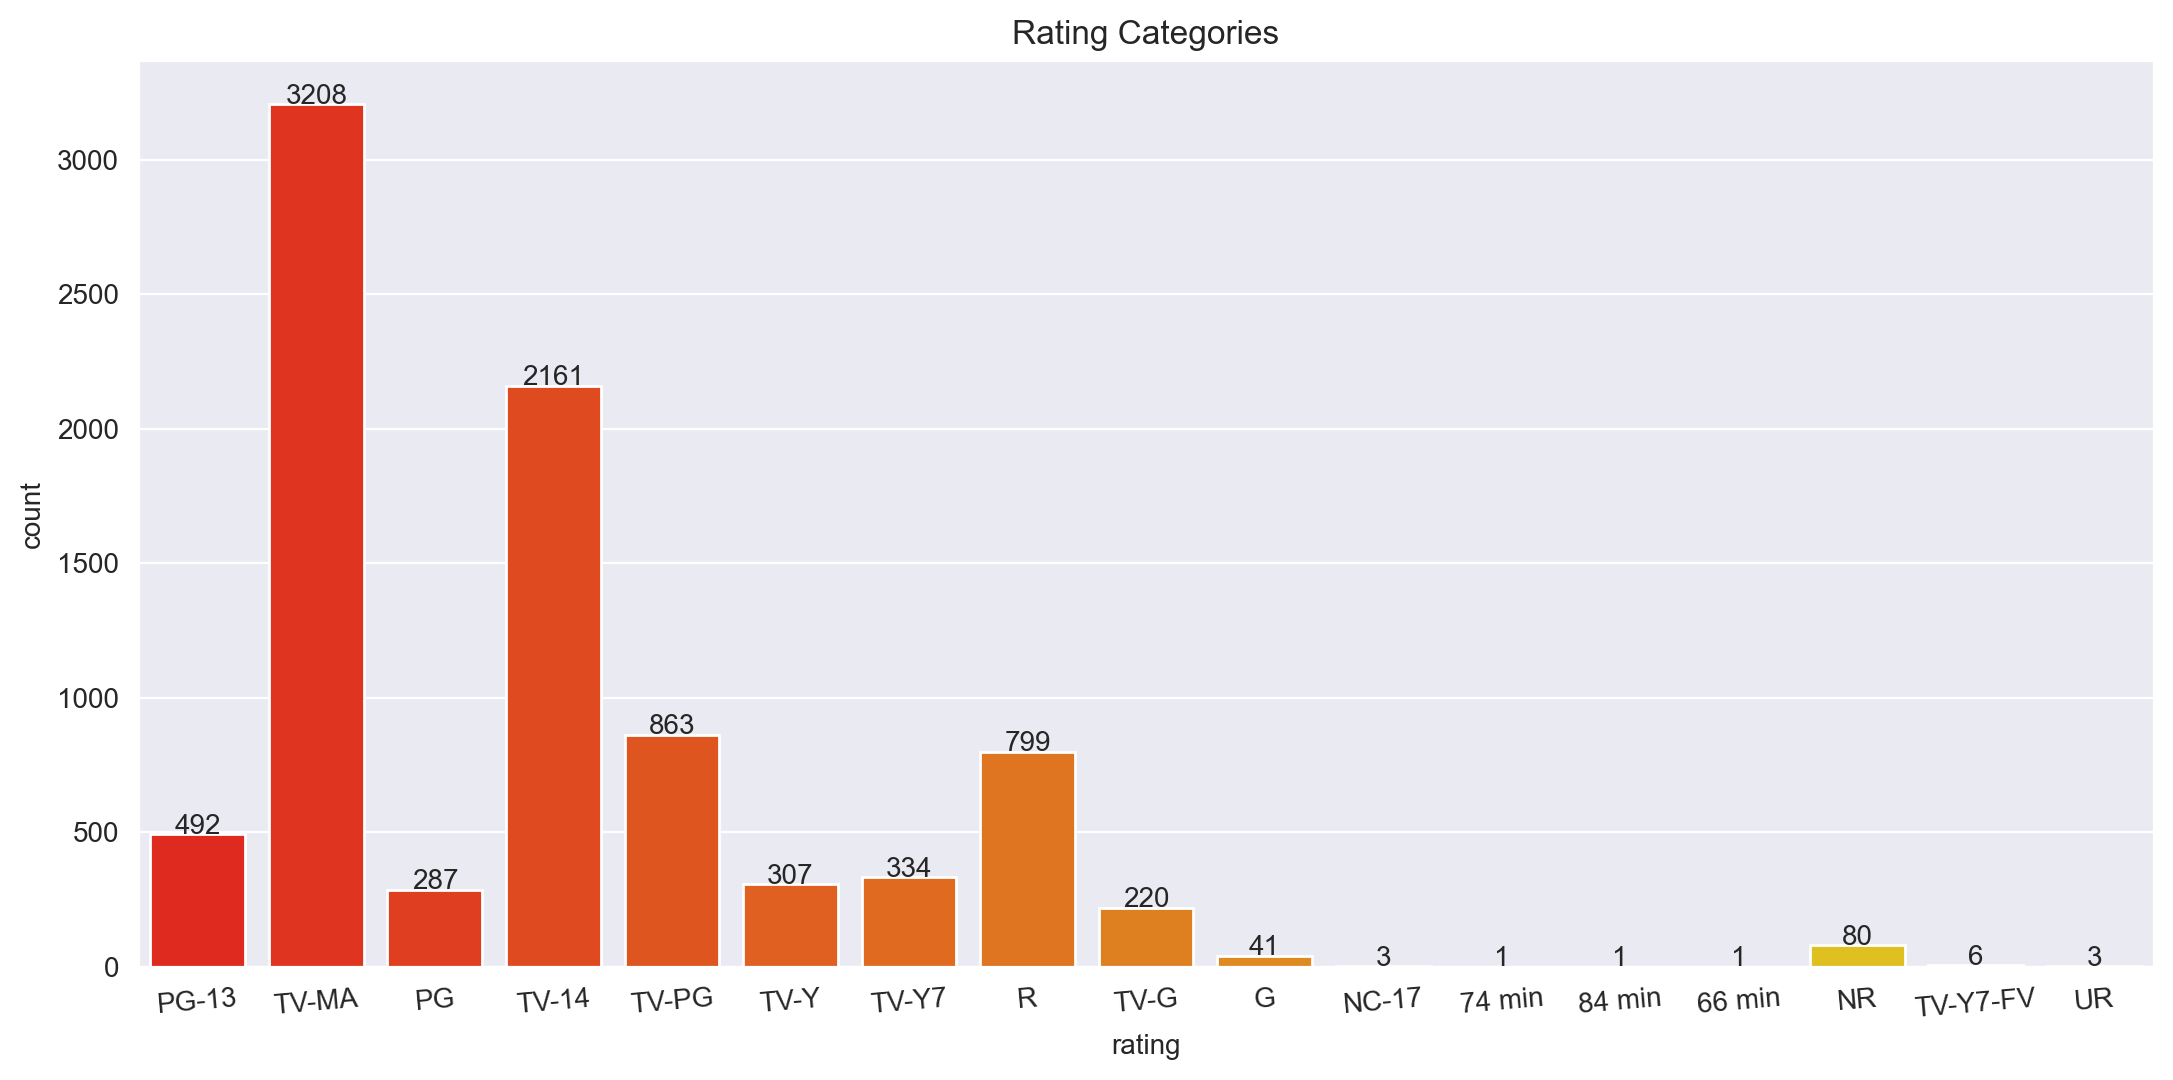

In [12]:
#plotting for Rating movies Categories

sns.set_style('darkgrid')
plt.figure(figsize=(13,6),dpi=200)
ax=sns.countplot(data=df,x='rating',palette='autumn')
plt.title('Rating Categories')
plt.xticks(rotation=5)

for container in ax.containers:
    ax.bar_label(container,label_type='edge',padding=-2)

TV-MA SEENS TO BE THE MOST RATING MOVIES CATEGORY

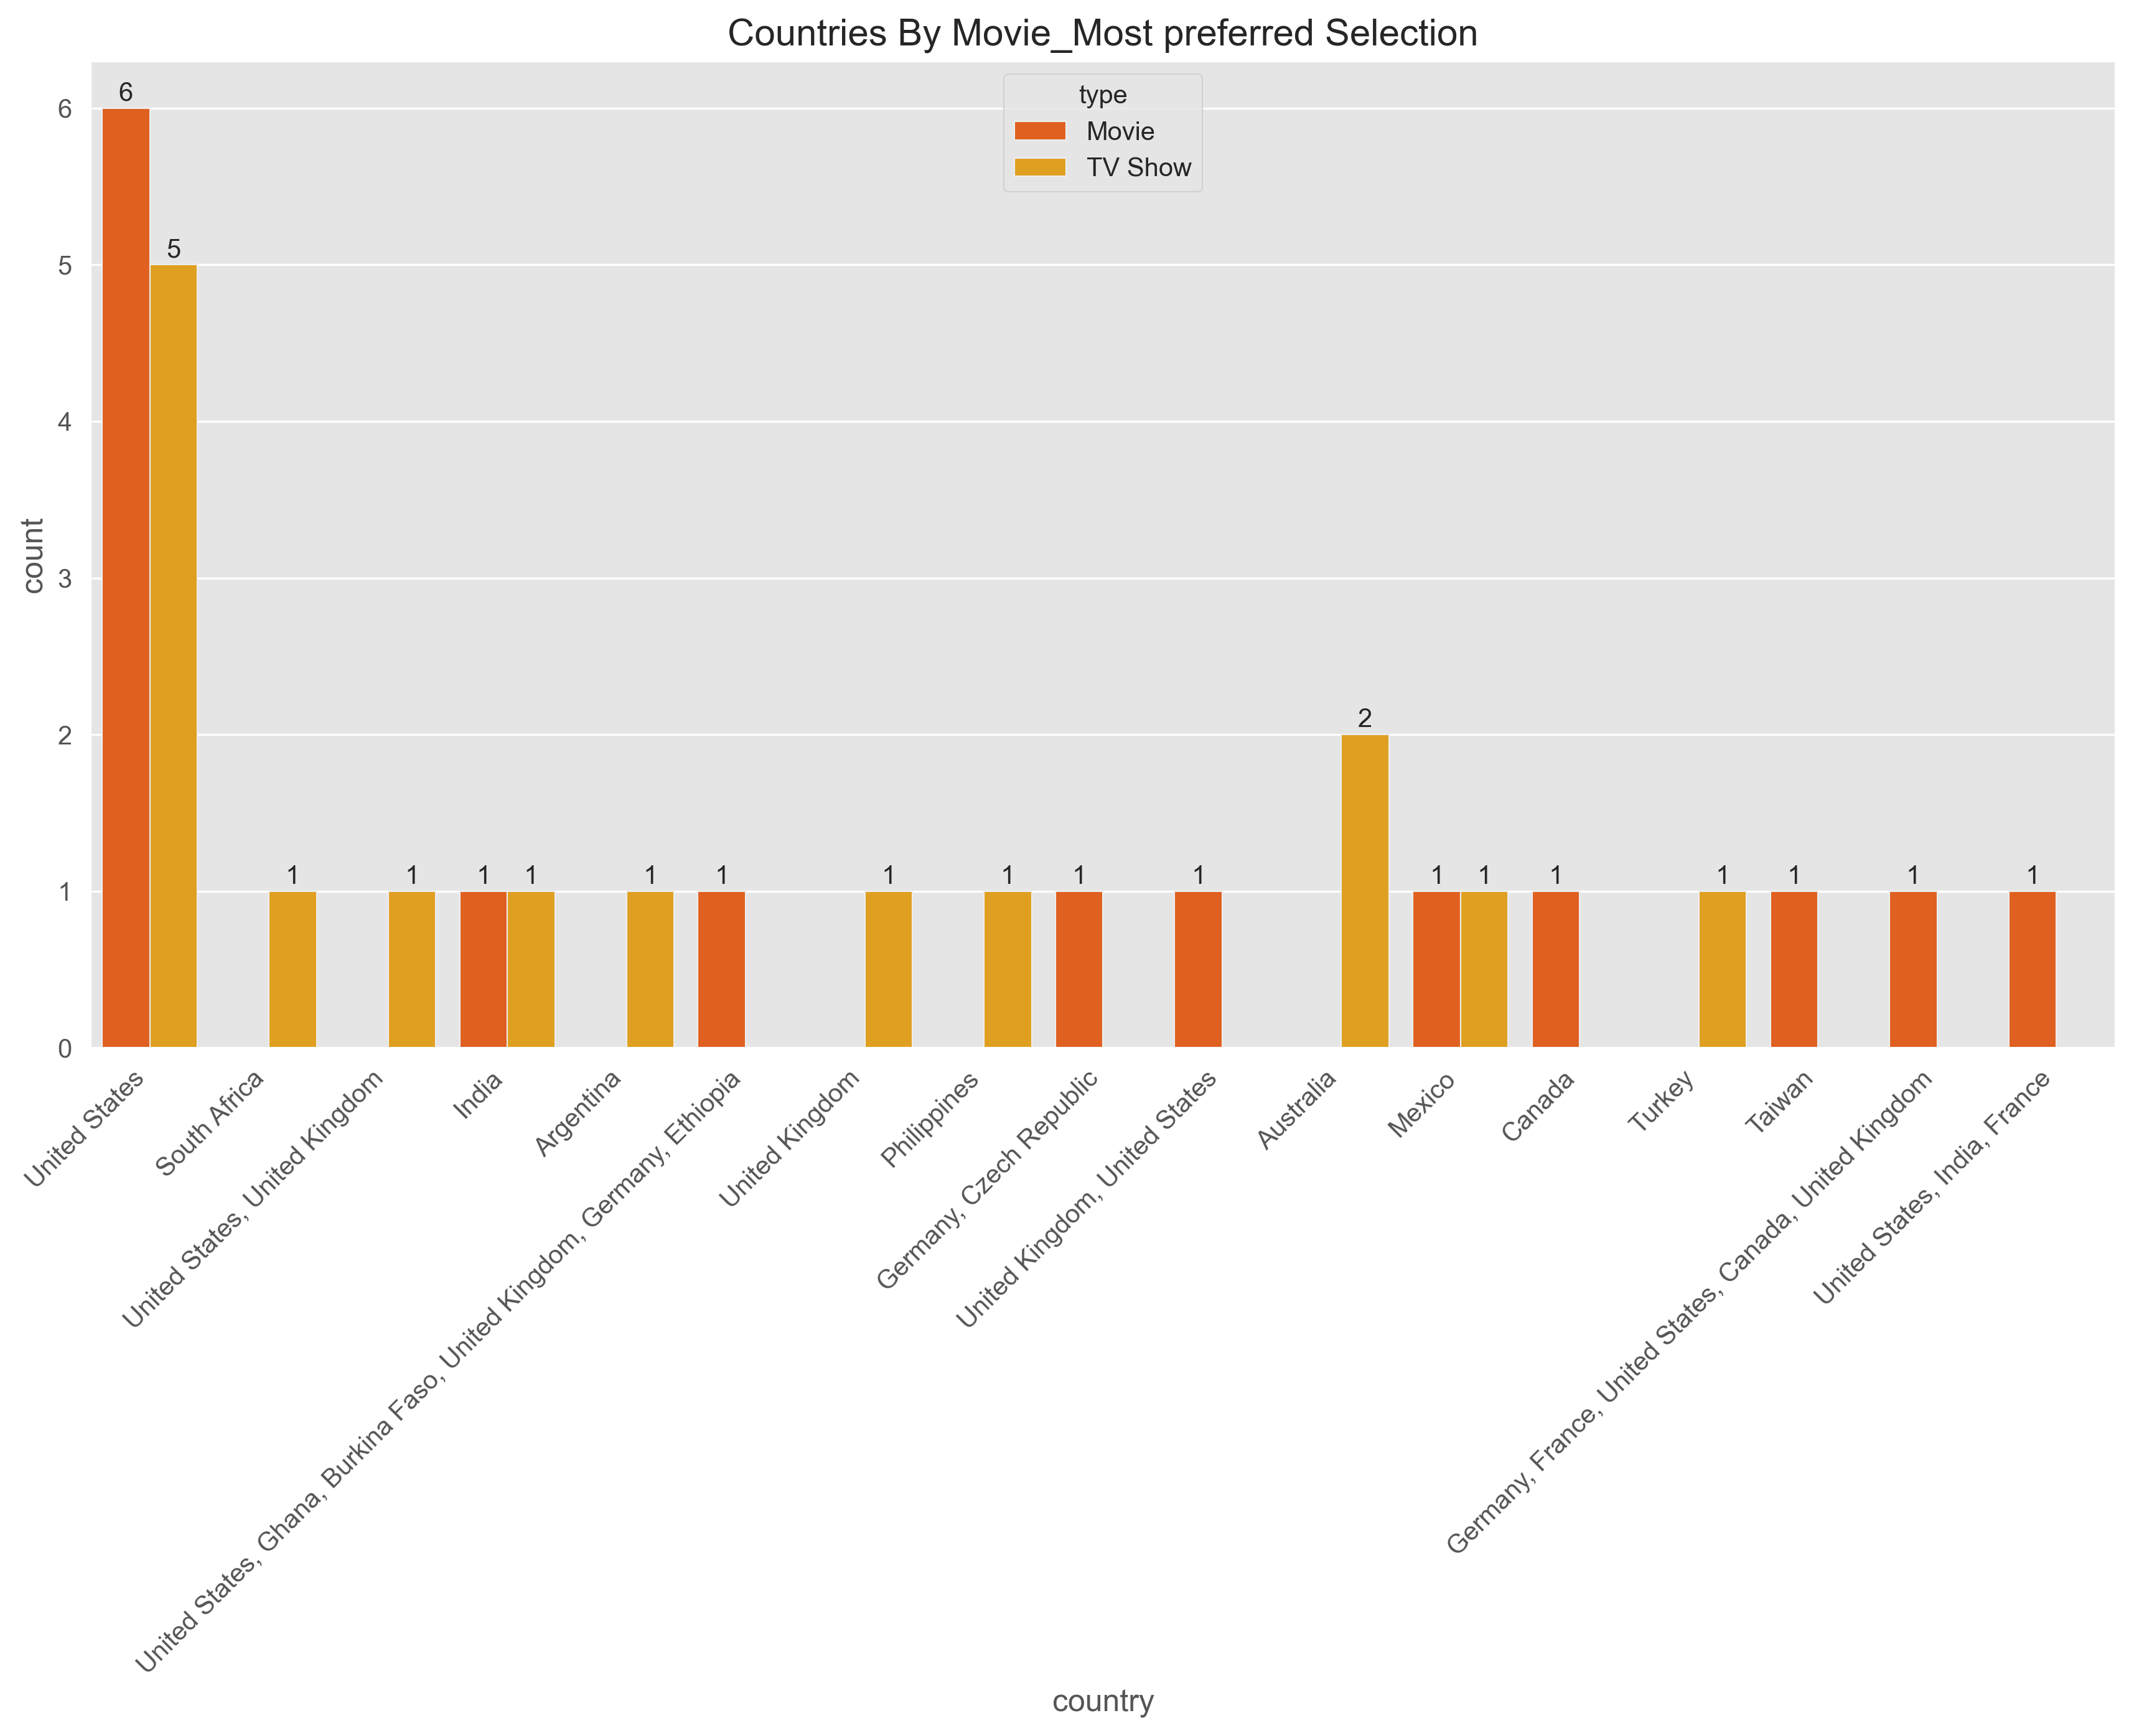

In [13]:
#let check for Countries with their Movies categories?


plt.style.use('ggplot')
plt.figure(figsize=(14,7),dpi=300)
figg=sns.countplot(data=df[:30],x='country',hue='type',palette='autumn')
plt.title('Countries By Movie_Most preferred Selection')
plt.xticks(rotation=45,ha='right')

for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=1)

UNITED STATE TAKE THE LEAD BOTH IN MOVIE & TVSHOW 🤯🤯🤯

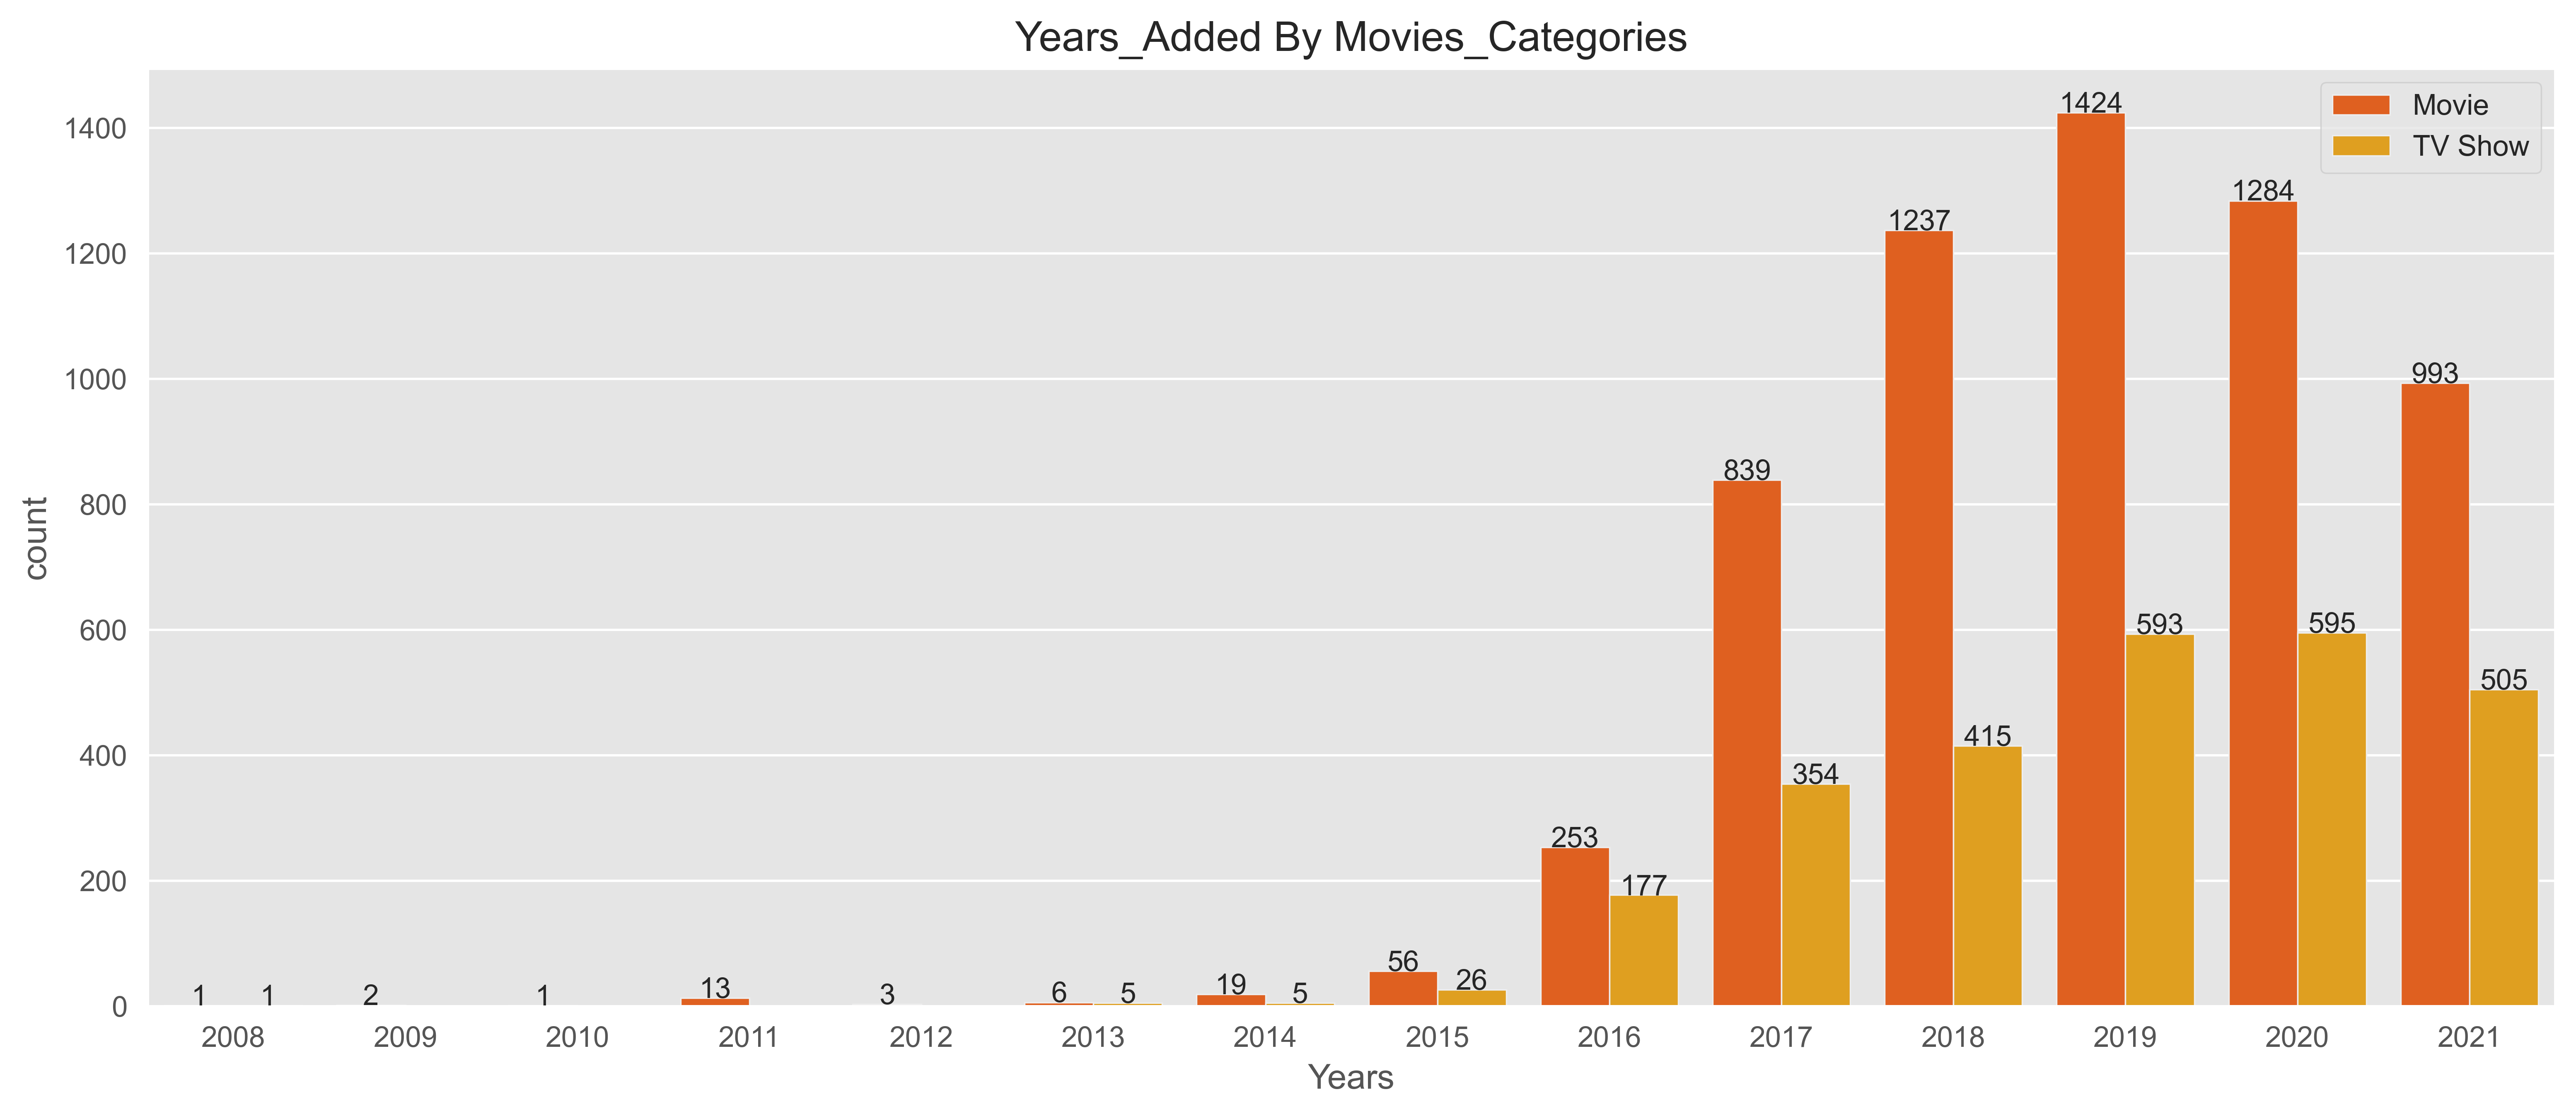

In [14]:
#checking for the Movies category BY Years_Added?

plt.style.use('ggplot')
plt.figure(figsize=(15,6),dpi=500)
ffig=sns.countplot(data=df,x='Years',hue='type',palette='autumn')
plt.title('Years_Added By Movies_Categories')
plt.legend(loc='best')
for container in ffig.containers:
    ffig.bar_label(container,label_type='edge',padding=-2)

In [15]:
#let check in for what is in for 2019

two_ninety=df[df['Years']==2019]

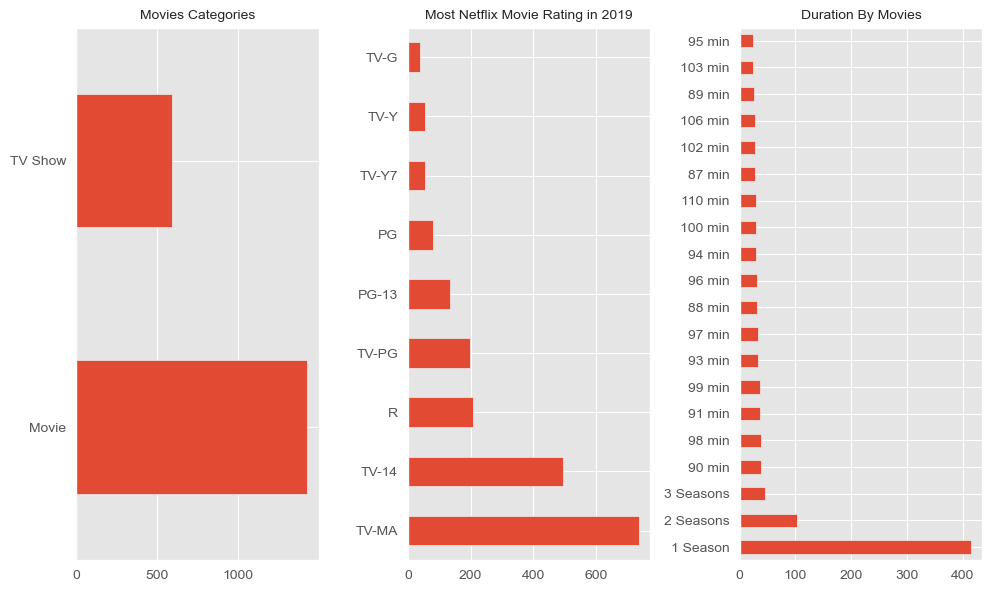

In [16]:
#let check the type of movies that was added in 2019

fig,ax=plt.subplots(1,3,figsize=(10,6),dpi=100)
two_ninety['type'].value_counts().plot.barh(figsize=(10,5),ax=ax[0])
ax[0].set_title('Movies Categories',fontsize=10)

two_ninety['rating'].value_counts()[:9].plot.barh(figsize=(10,5),ax=ax[1])
ax[1].set_title('Most Netflix Movie Rating in 2019',fontsize=10)
fig.tight_layout(pad=1)

two_ninety['duration'].value_counts()[:20].plot.barh(figsize=(10,6),ax=ax[2])
ax[2].set_title('Duration By Movies',fontsize=10)
fig.tight_layout(pad=1)

In [17]:
#we replacing the value in duration columns because seeing season 1,season 2 adn season 3 is not clear 

two_ninety['duration']=df['duration'].replace('1 Season','90 min',regex=False)
two_ninety['duration']=df['duration'].replace('2 Seasons','98 min',regex=False)
two_ninety['duration']=df['duration'].replace('3 Seasons','91 min',regex=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_23864\4098162919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_ninety['duration']=df['duration'].replace('1 Season','90 min',regex=False)
C:\Users\HP\AppData\Local\Temp\ipykernel_23864\4098162919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_ninety['duration']=df['duration'].replace('2 Seasons','98 min',regex=False)
C:\Users\HP\AppData\Local\Temp\ipykernel_23864\4098162919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [19]:
df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

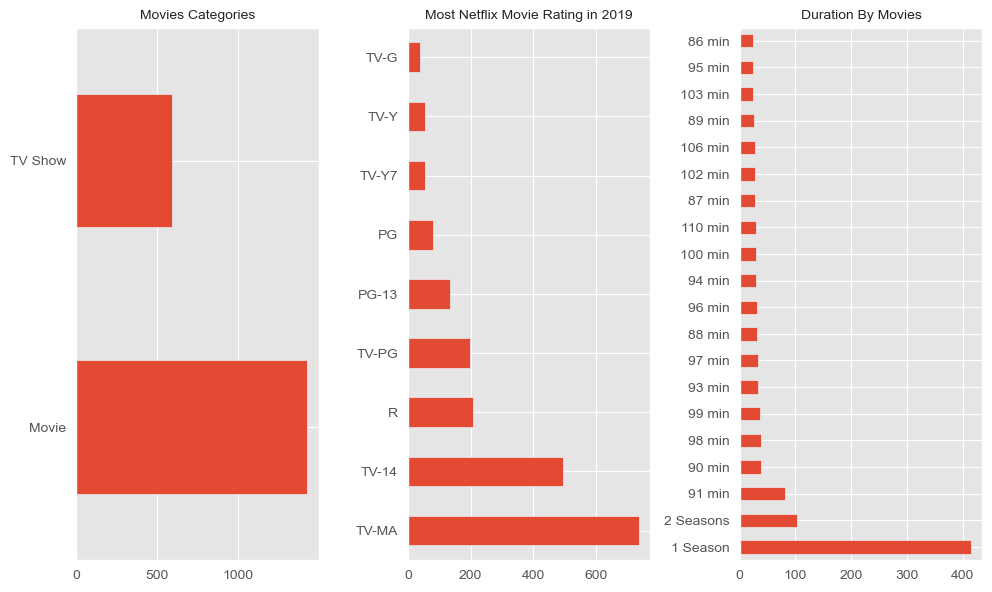

In [18]:
fig,ax=plt.subplots(1,3,figsize=(10,6),dpi=100)
two_ninety['type'].value_counts().plot.barh(figsize=(10,5),ax=ax[0])
ax[0].set_title('Movies Categories',fontsize=10)

two_ninety['rating'].value_counts()[:9].plot.barh(figsize=(10,5),ax=ax[1])
ax[1].set_title('Most Netflix Movie Rating in 2019',fontsize=10)
fig.tight_layout(pad=1)

two_ninety['duration'].value_counts()[:20].plot.barh(figsize=(10,6),ax=ax[2])
ax[2].set_title('Duration By Movies',fontsize=10)
fig.tight_layout(pad=1)

In [21]:
two_ninety['duration']=two_ninety['duration'].str.replace('2 Seasons','92 min')

C:\Users\HP\AppData\Local\Temp\ipykernel_23864\1578044595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_ninety['duration']=two_ninety['duration'].str.replace('2 Seasons','92 min')


In [22]:
two_ninety['duration']=two_ninety['duration'].str.replace('1 Season','98 min')

C:\Users\HP\AppData\Local\Temp\ipykernel_23864\1709857928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_ninety['duration']=two_ninety['duration'].str.replace('1 Season','98 min')


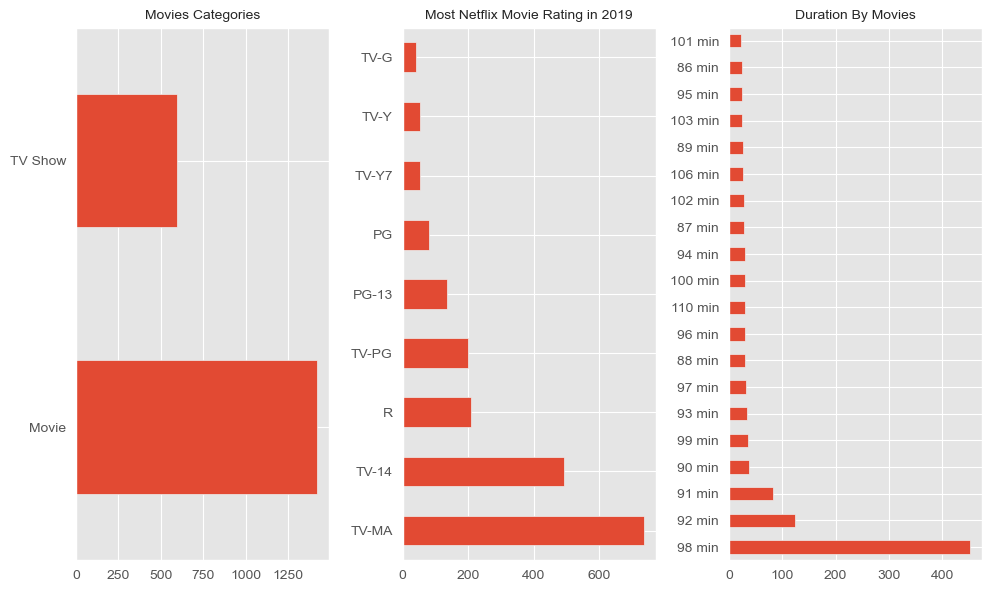

In [24]:
#let check the type of movies that was added in 2019

fig,ax=plt.subplots(1,3,figsize=(10,6),dpi=100)
two_ninety['type'].value_counts().plot.barh(figsize=(10,5),ax=ax[0])
ax[0].set_title('Movies Categories',fontsize=10)

two_ninety['rating'].value_counts()[:9].plot.barh(figsize=(10,5),ax=ax[1])
ax[1].set_title('Most Netflix Movie Rating in 2019',fontsize=10)
fig.tight_layout(pad=1)

two_ninety['duration'].value_counts()[:20].plot.barh(figsize=(10,6),ax=ax[2])
ax[2].set_title('Duration By Movies',fontsize=10)
fig.tight_layout(pad=1)

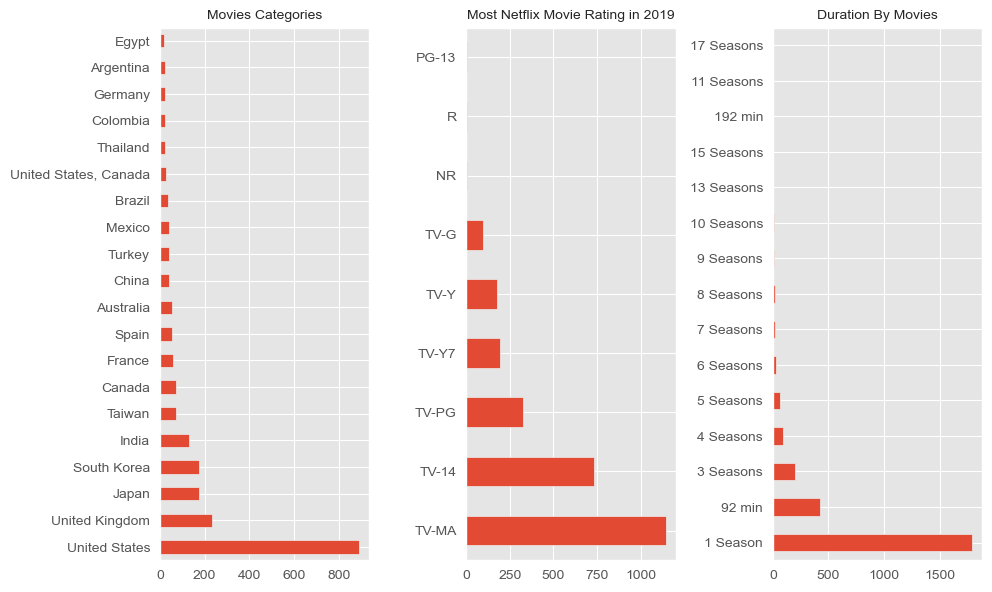

In [25]:
#CHECKING FOR TV_show, 

tvshow=df[df['type']=='TV Show']

fig,ax=plt.subplots(1,3,figsize=(10,6),dpi=100)
tvshow['country'].value_counts()[:20].plot.barh(figsize=(10,5),ax=ax[0])
ax[0].set_title('Movies Categories',fontsize=10)

tvshow['rating'].value_counts()[:9].plot.barh(figsize=(10,5),ax=ax[1])
ax[1].set_title('Most Netflix Movie Rating in 2019',fontsize=10)
fig.tight_layout(pad=1)

tvshow['duration'].value_counts()[:20].plot.barh(figsize=(10,6),ax=ax[2])
ax[2].set_title('Duration By Movies',fontsize=10)
fig.tight_layout(pad=1)

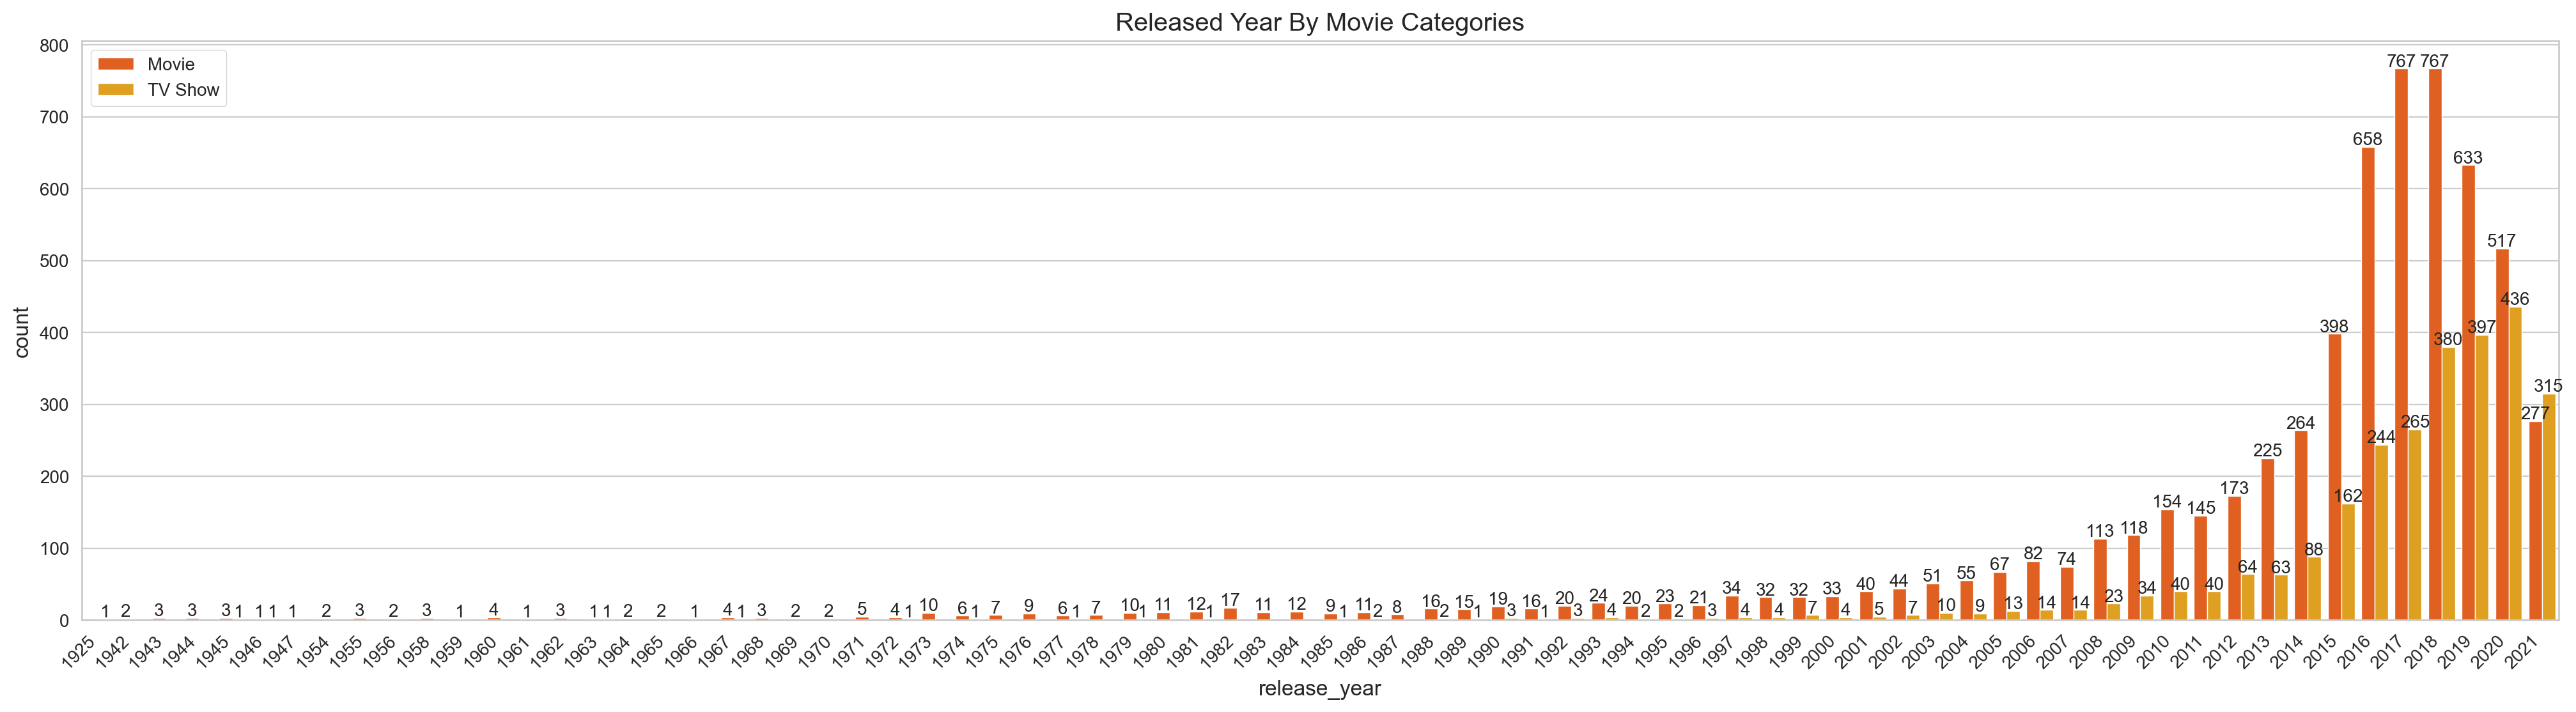

In [27]:
#Checking for Released Years of Movies by movies Types?

sns.set_style('whitegrid')
plt.figure(figsize=(25,6),dpi=200)
fig=sns.countplot(data=df,x='release_year',hue='type',palette='autumn')
plt.title('Released Year By Movie Categories')
plt.xticks(rotation=45,ha='right')
plt.legend(loc='upper left');
for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-1)

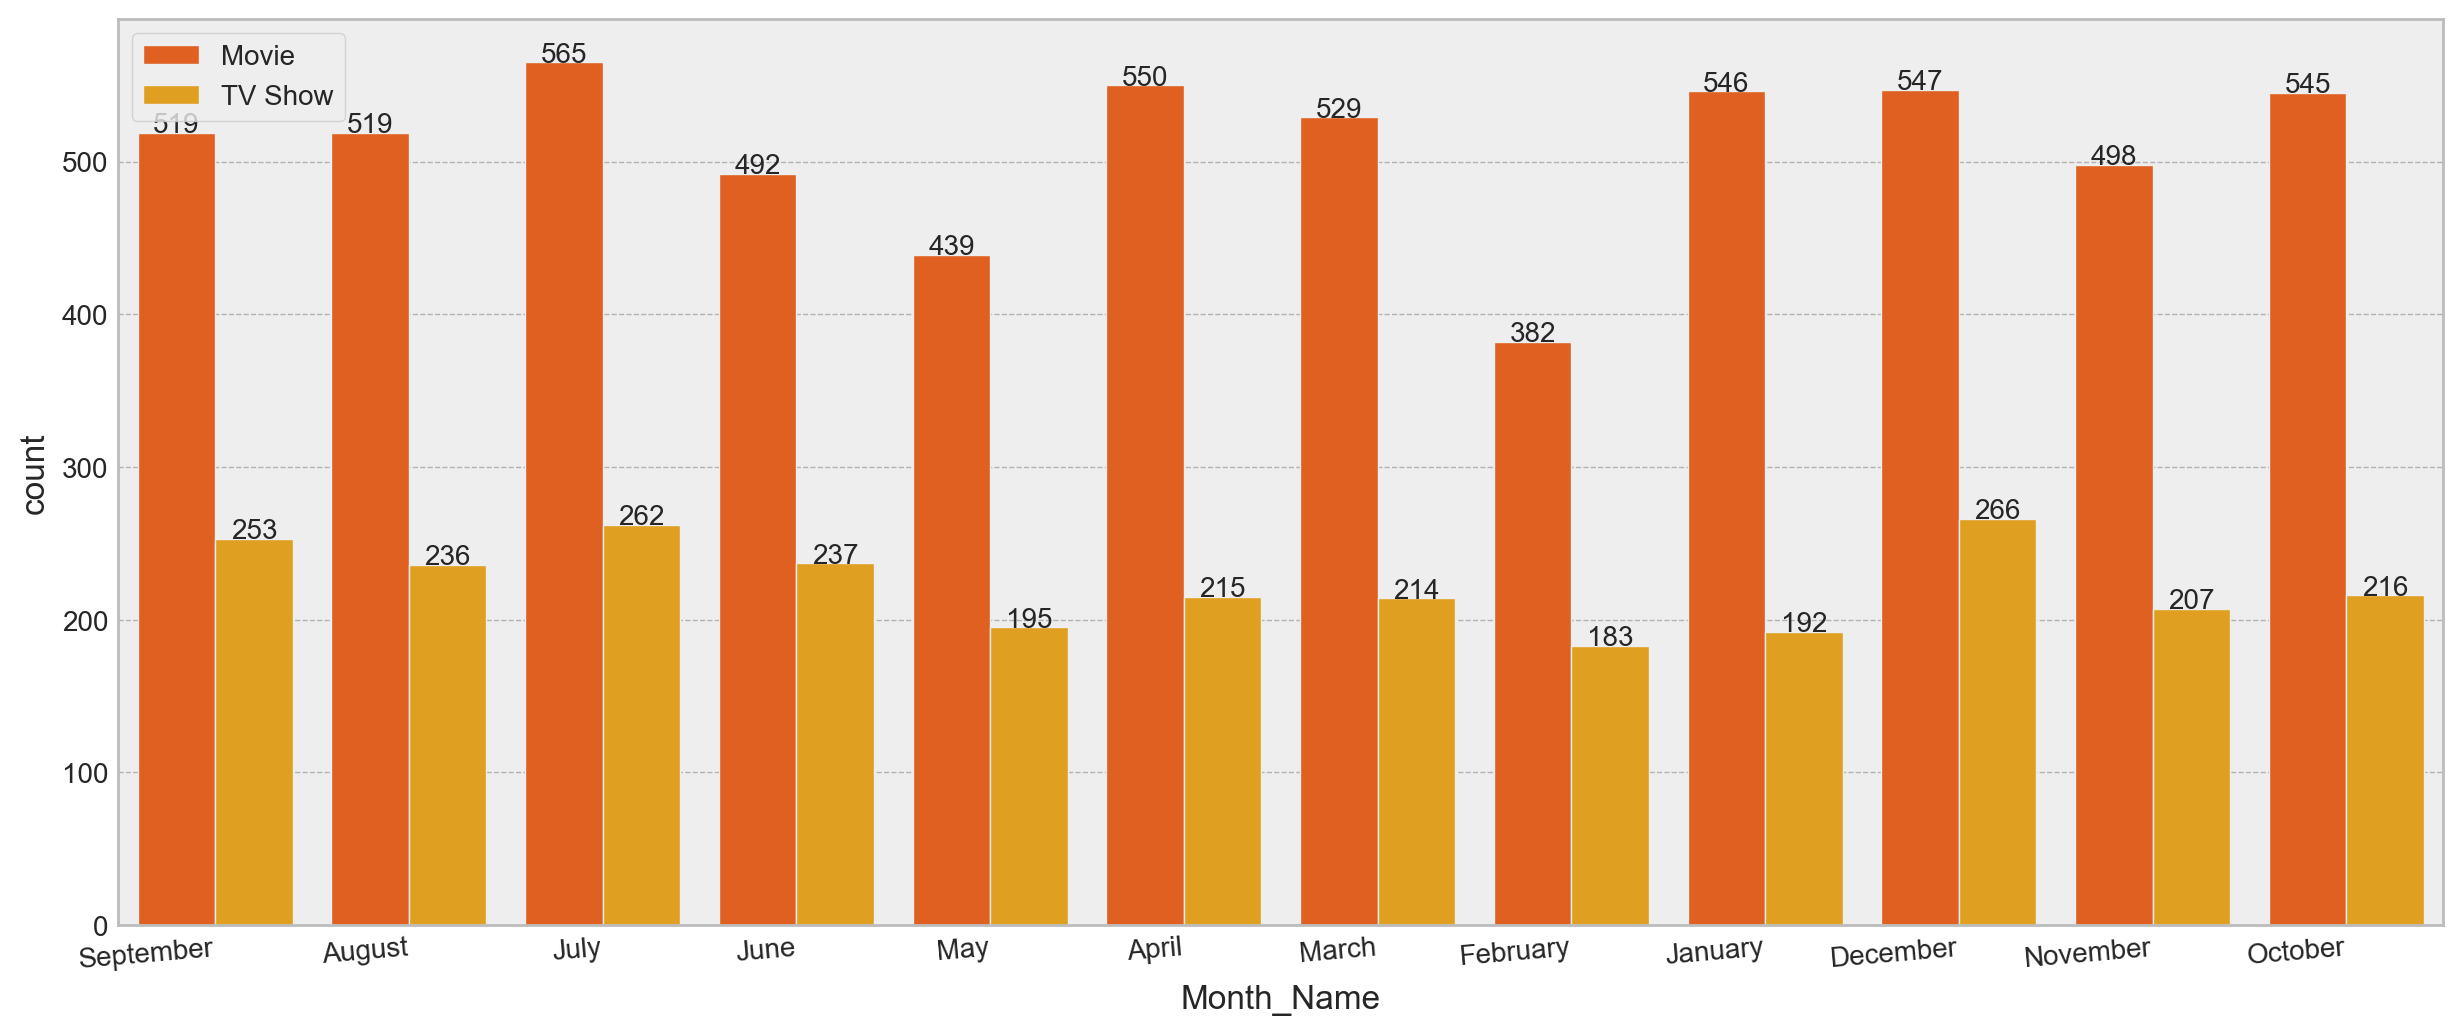

In [31]:
#Let Find out The month where most movies and tvshows pop out.


plt.style.use('bmh')
plt.figure(figsize=(15,6),dpi=200)
ax=sns.countplot(data=df,x='Month_Name',hue='type',palette='autumn')
plt.xticks(rotation=5,ha='right')
plt.legend(loc='upper left')
for container in ax.containers:
    ax.bar_label(container,label_type='edge',padding=-2)

MONTH OF AUGUST TAKE THE LEAD. HAS THE MOST RELEASED YEAR MOVIES IN NETFLIX WHY IN THE MONTH OF DECEMBER TAKE THE LEAD FOR TVSHOWS.

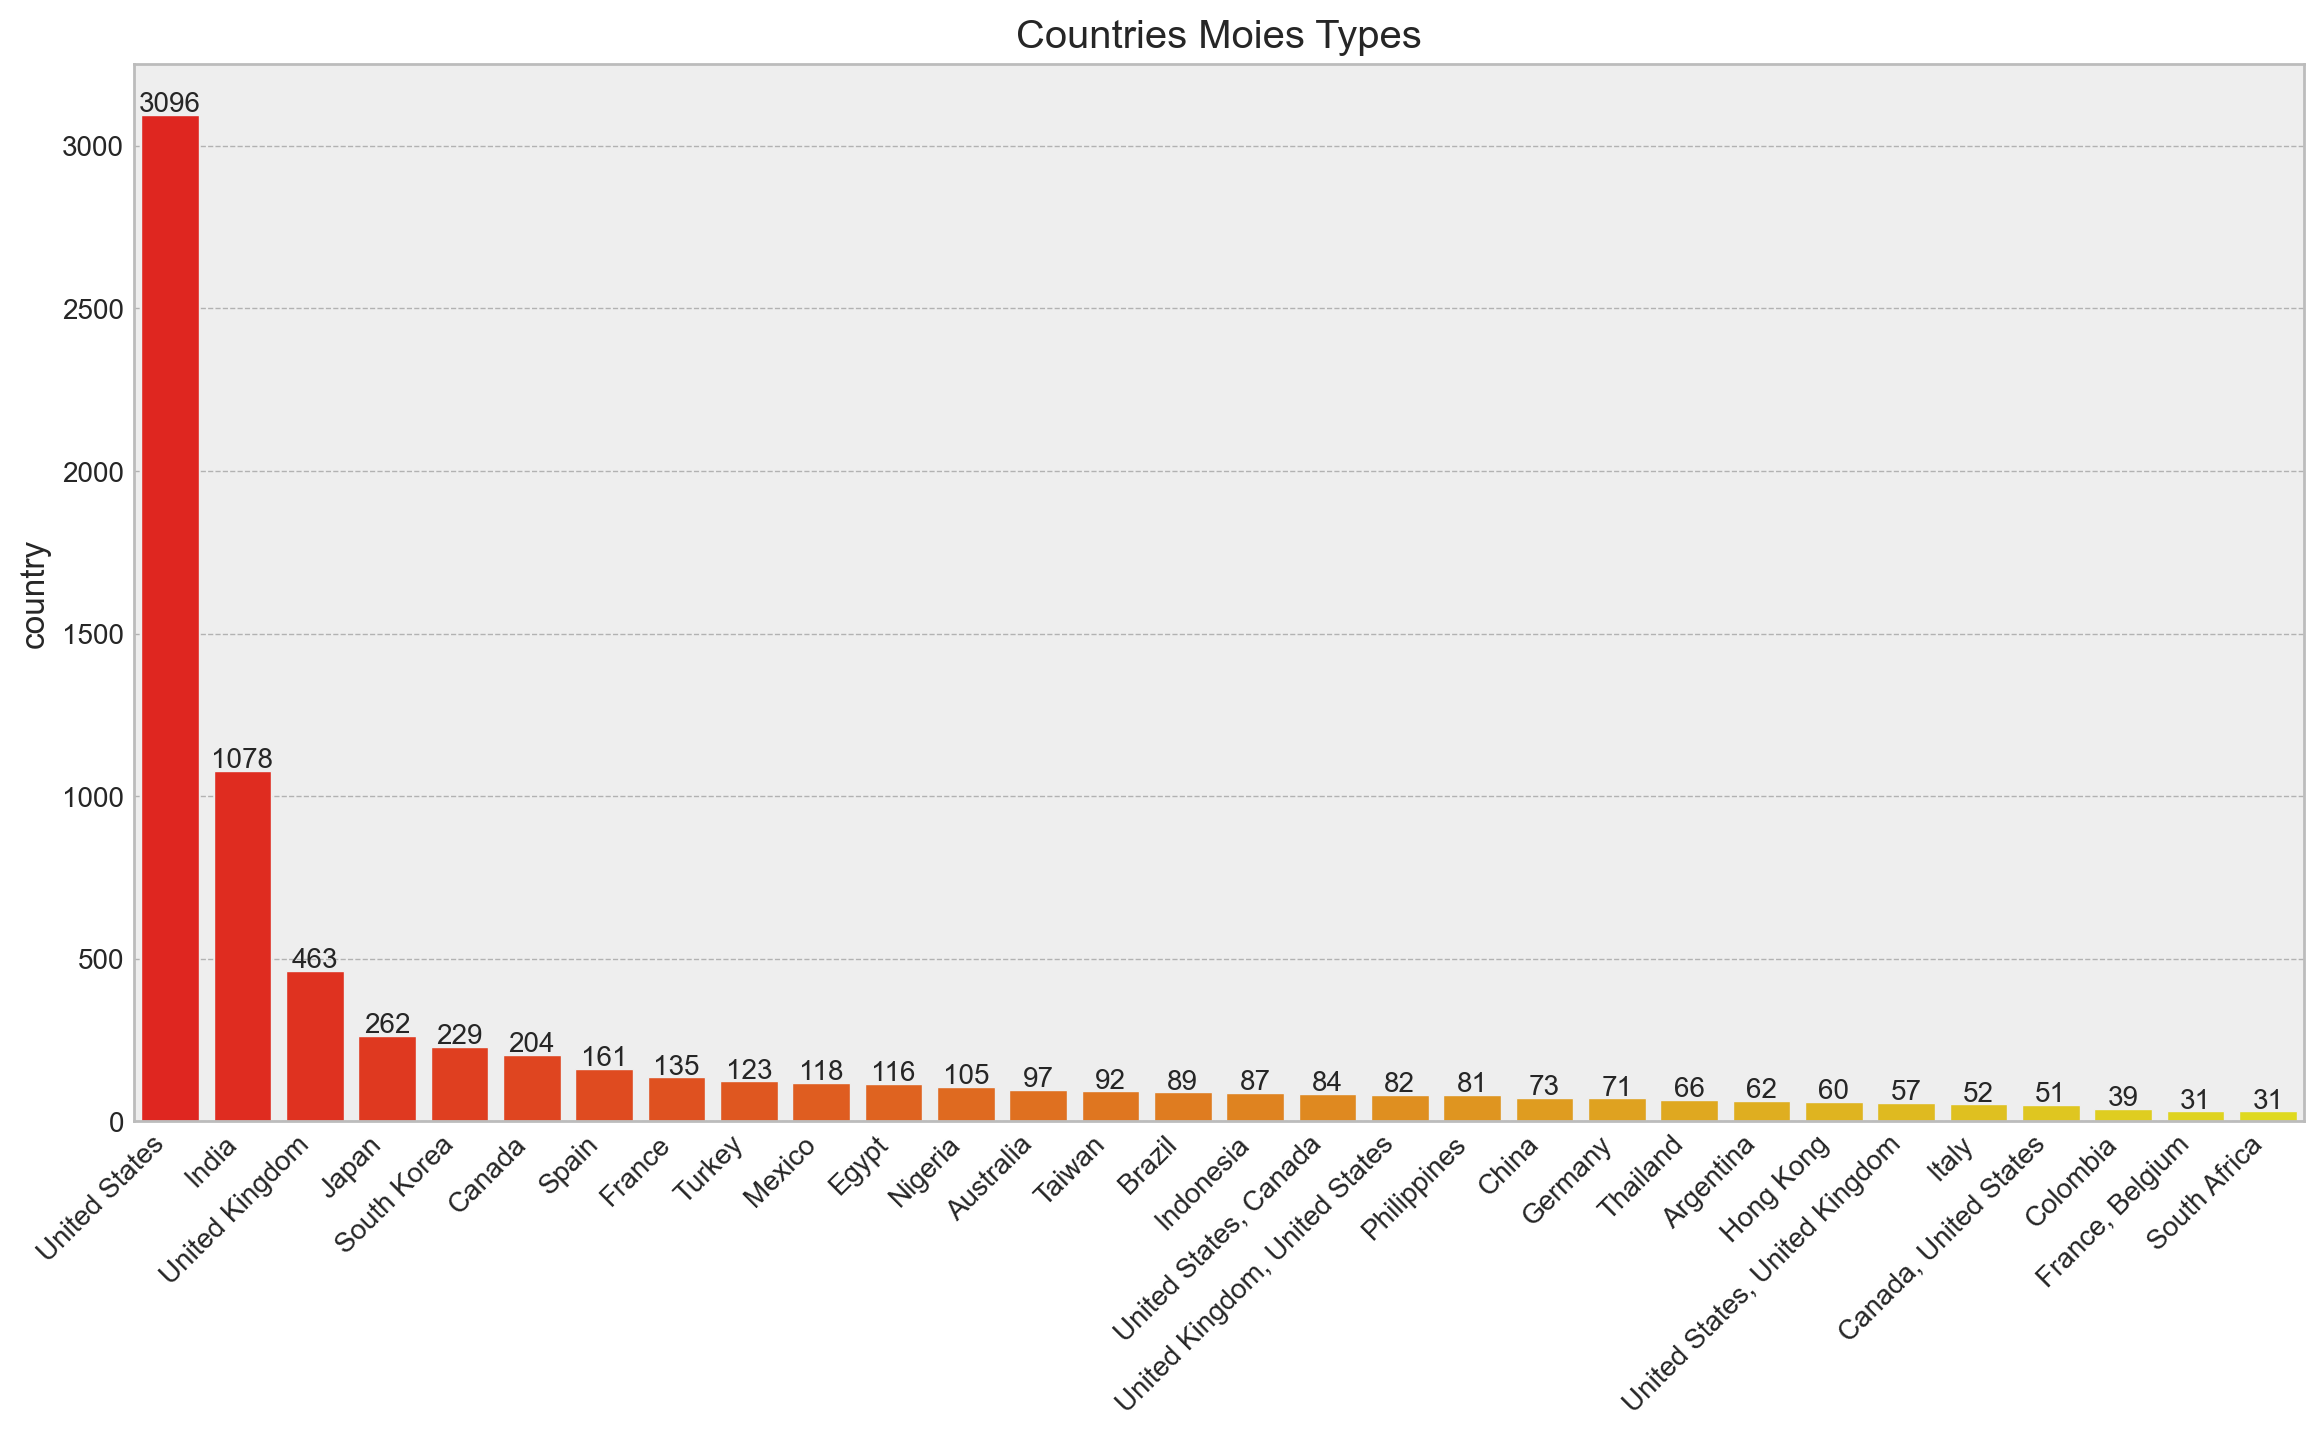

In [34]:
#let check out the countries ?

figg=df['country'].value_counts()[:30]
plt.figure(figsize=(14,7),dpi=200)
fig=sns.barplot(data=df,x=figg.index,y=figg,palette='autumn')
plt.title('Countries Moies Types')
plt.xticks(rotation=45,ha='right')
for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-1)

USA TAKE THE LEAD.

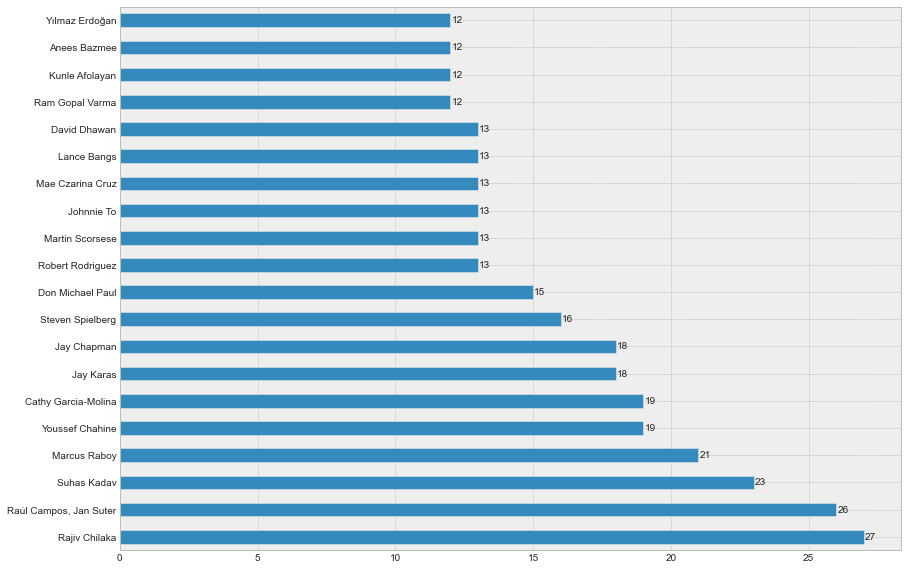

In [35]:
#MOvies directors Movies🤔🤔🤔 let go check that out?

axes=df['director'].value_counts()[:20].plot(kind='barh',figsize=(14,10))
for container in axes.containers:
    axes.bar_label(container,label_type='edge',padding=1)

In [36]:
#Rajiv chilaka is the most movies directors and Suhas Kadav.

#let check the Type of movie Both Parties produced?🤔🤔🤔

In [37]:
# for Rajiv Chilaka?

raj=df[df['director']=='Rajiv Chilaka']

raj

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,Month_Name,Days_Name,Years
406,s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...,July,Thursday,2021
407,s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2009,TV-Y7,68 min,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...,July,Thursday,2021
408,s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,2011,TV-Y7,67 min,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...,July,Thursday,2021
409,s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Nigeria,2010,TV-Y7,66 min,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...,July,Thursday,2021
410,s411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2013,TV-Y7,64 min,Children & Family Movies,When a stranger tries to steal an amulet from ...,July,Thursday,2021
411,s412,Movie,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2013,TV-Y7,64 min,Children & Family Movies,To save the kingdom of Valhalla from invasion ...,July,Thursday,2021
412,s413,Movie,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Egypt,2013,TV-Y7,65 min,Children & Family Movies,"When Dholakpur’s princess is kidnapped, Bheem ...",July,Thursday,2021
413,s414,Movie,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Spain,2013,TV-Y7,64 min,Children & Family Movies,After learning of a samurai village under thre...,July,Thursday,2021
414,s415,Movie,Chhota Bheem Aur Hanuman,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Canada,2012,TV-Y7,68 min,Children & Family Movies,When two evil entities kidnap a princess in a ...,July,Thursday,2021
415,s416,Movie,Chhota Bheem aur Krishna,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2009,TV-Y7,68 min,Children & Family Movies,"Centuries after the end of a conqueror's rule,...",July,Thursday,2021


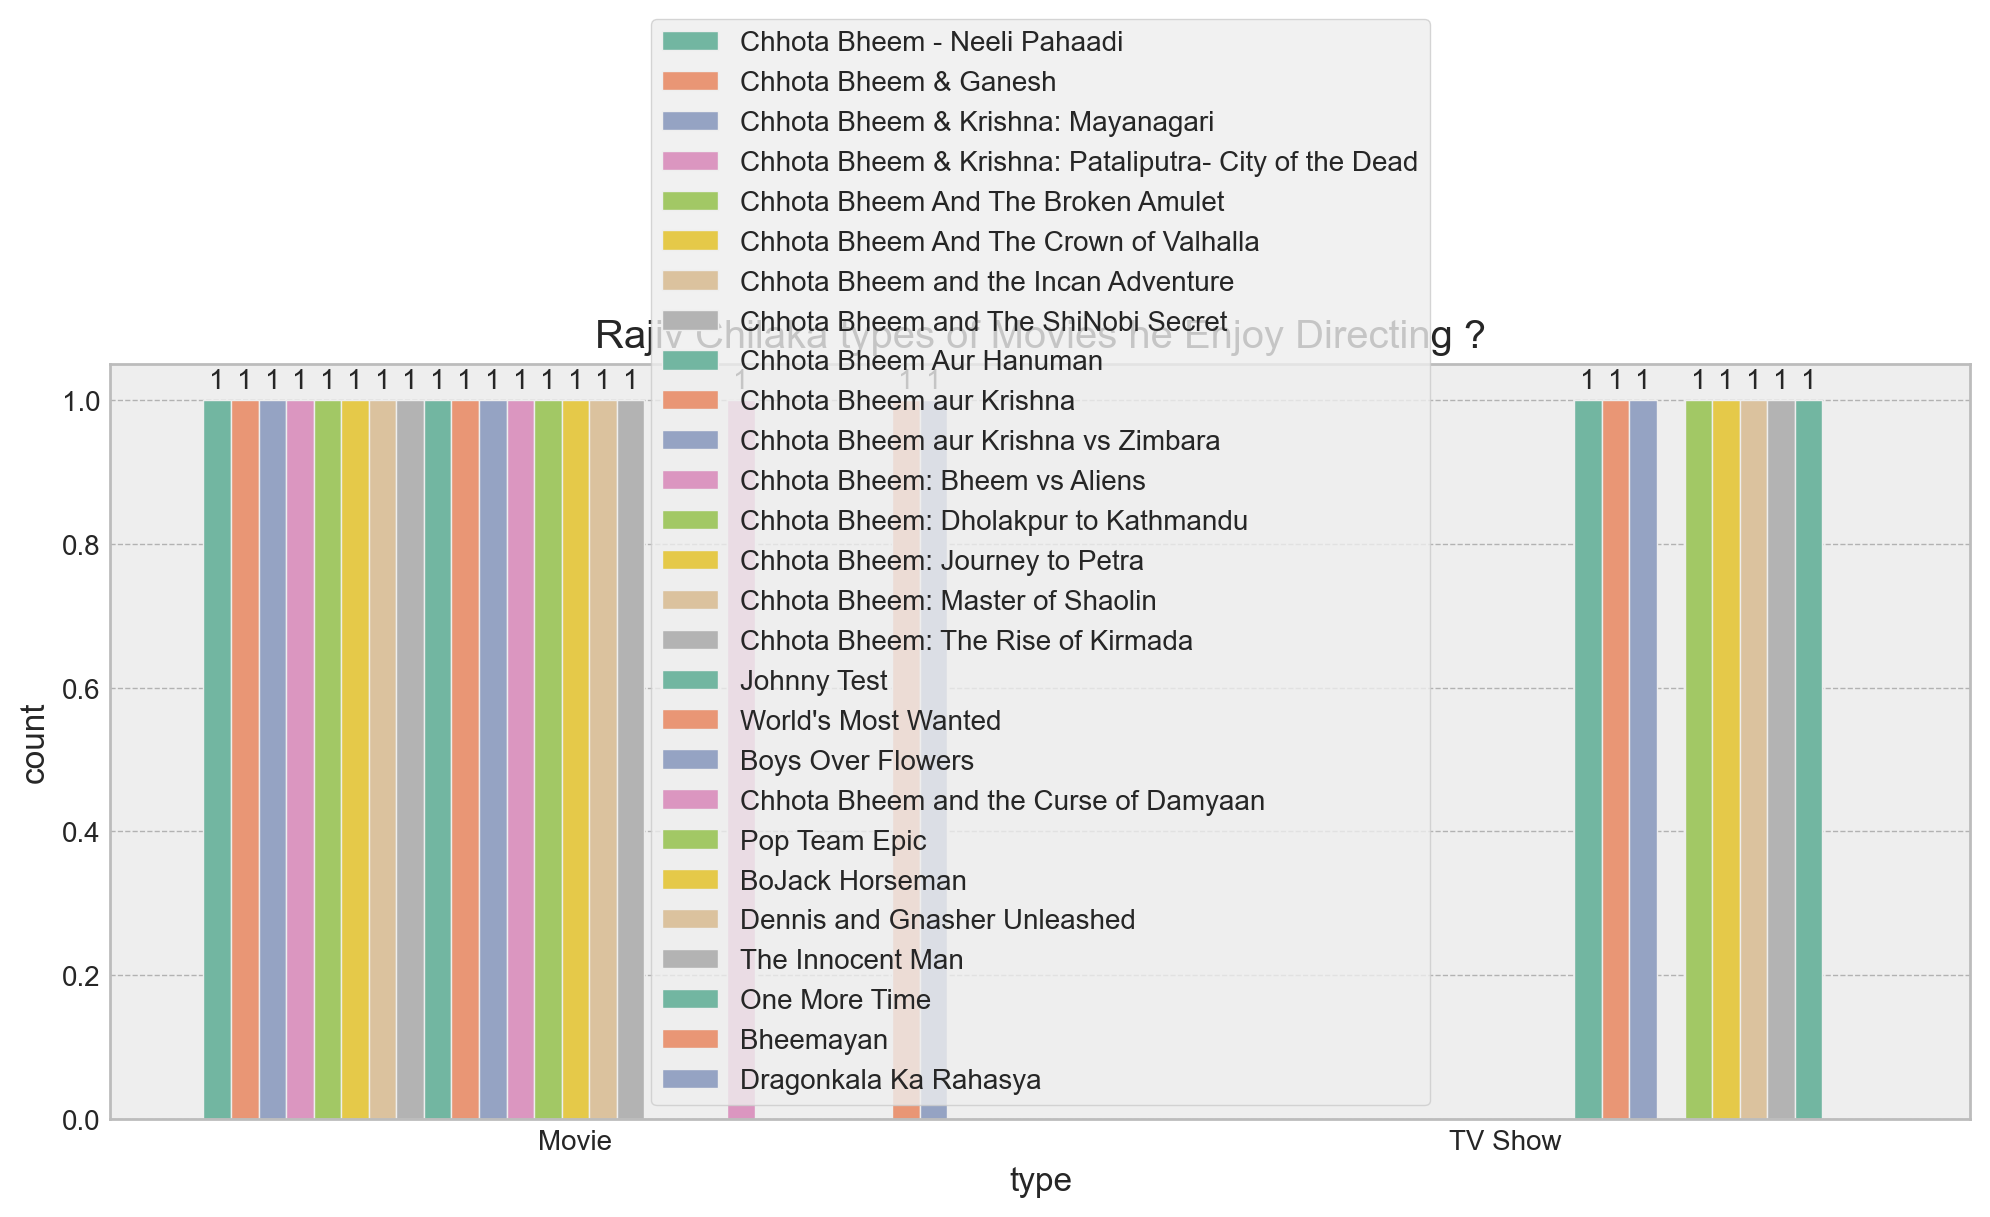

In [39]:
#let check for RAJIV CHILAKA produces the most Movies ?
plt.figure(figsize=(12,5),dpi=200)
fig=sns.countplot(data=raj,x='type',hue='title',palette='Set2')
plt.title('Rajiv Chilaka types of Movies he Enjoy Directing ?')
plt.legend(loc='best')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=2)

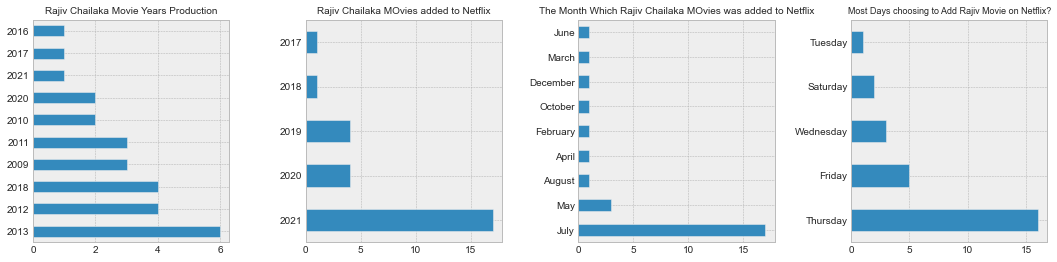

In [41]:
#let check the RajiV most Years of Released movies and the years it was added  to netflix and the likes of it.?


#Raj Movies Released Production Year
fig,ax=plt.subplots(1,4,figsize=(10,6))
raj['release_year'].value_counts().plot.barh(figsize=(10,6),ax=ax[0])
ax[0].set_title('Rajiv Chailaka Movie Years Production',fontsize=10)

#Rajiv Movies Years of Addeding to Netflix
raj['Years'].value_counts().plot.barh(figsize=(10,5),ax=ax[1])
ax[1].set_title('Rajiv Chailaka MOvies added to Netflix',fontsize=10)
fig.tight_layout(pad=1)

#Rajiv movies month It was added to production
raj['Month_Name'].value_counts().plot.barh(figsize=(10,5),ax=ax[2])
ax[2].set_title('The Month Which Rajiv Chailaka MOvies was added to Netflix',fontsize=10)
fig.tight_layout(pad=2)

#Rajiv Movies Added Days in Netflix?
raj['Days_Name'].value_counts().plot.barh(figsize=(15,4),ax=ax[3])
ax[3].set_title('Most Days choosing to Add Rajiv Movie on Netflix?',fontsize=9)
fig.tight_layout(pad=2)



In [42]:
#searching for their Name 


#df['director'].sample(60)
suh=df[df['director']=='Suhas Kadav']
suh

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,Month_Name,Days_Name,Years
245,s246,TV Show,Korean Cold Noodle Rhapsody,Suhas Kadav,Paik Jong-won,India,2021,TV-PG,1 Season,"Docuseries, International TV Shows","Refreshing and flavorful, naengmyeon is Korea'...",August,Friday,2021
937,s938,Movie,Motu Patlu in Dragon's World,Suhas Kadav,Saurav Chakrabarty,"United States, Canada",2017,TV-Y7,78 min,"Children & Family Movies, Comedies",A trip to a magical land of dragons turns acti...,May,Saturday,2021
938,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,Saurav Chakraborty,United States,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",A board game becomes all too real for buddies ...,May,Saturday,2021
939,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,"Saurav Chakraborty, Omi Sharma, Sankalp, Brian...",United States,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals",When pals Motu and Patlu take a ride in their ...,May,Saturday,2021
940,s941,Movie,Motu Patlu: Deep Sea Adventure,Suhas Kadav,"Saurav Chakraborty, Vinod Kulkarni, Mayur Vyas...",India,2014,TV-Y7,76 min,"Children & Family Movies, Comedies",Friends Motu and Patlu get more maritime excit...,May,Saturday,2021
941,s942,Movie,Motu Patlu: Mission Moon,Suhas Kadav,"Saurav Chakraborty, Omee, Sankalp, Rajesh, Vin...",Nigeria,2013,TV-Y7,71 min,"Children & Family Movies, Comedies",An otherworldly enemy has been turning the moo...,May,Saturday,2021
1006,s1007,Movie,Motu Patlu Dino Invasion,Suhas Kadav,"Sourav Chakraborty, Mayur Vyas, Anil Datt",United States,2018,TV-Y7,80 min,"Children & Family Movies, Comedies",A time machine sends Motu and Patlu back to th...,April,Tuesday,2021
1007,s1008,Movie,Motu Patlu in Octupus World,Suhas Kadav,"Sourav Chakraborty, Vidit Kumar, Mayur Vyas, M...",South Korea,2017,TV-Y,81 min,"Children & Family Movies, Comedies",While returning a goldfish and an octopus from...,April,Tuesday,2021
1008,s1009,Movie,Motu Patlu VS Robo Kids,Suhas Kadav,"Sourav Chakraborty, Anil Dutt",Hong Kong,2019,TV-Y,84 min,Children & Family Movies,"For Motu, facing off against three children be...",April,Tuesday,2021
1048,s1049,TV Show,Power Players,Suhas Kadav,"Kieran Walton, Carlos Salazar, Greg Chun, Jami...","United States, France",2020,TV-Y,3 Seasons,Kids' TV,A kid transforms into an action figure-sized s...,April,Thursday,2021


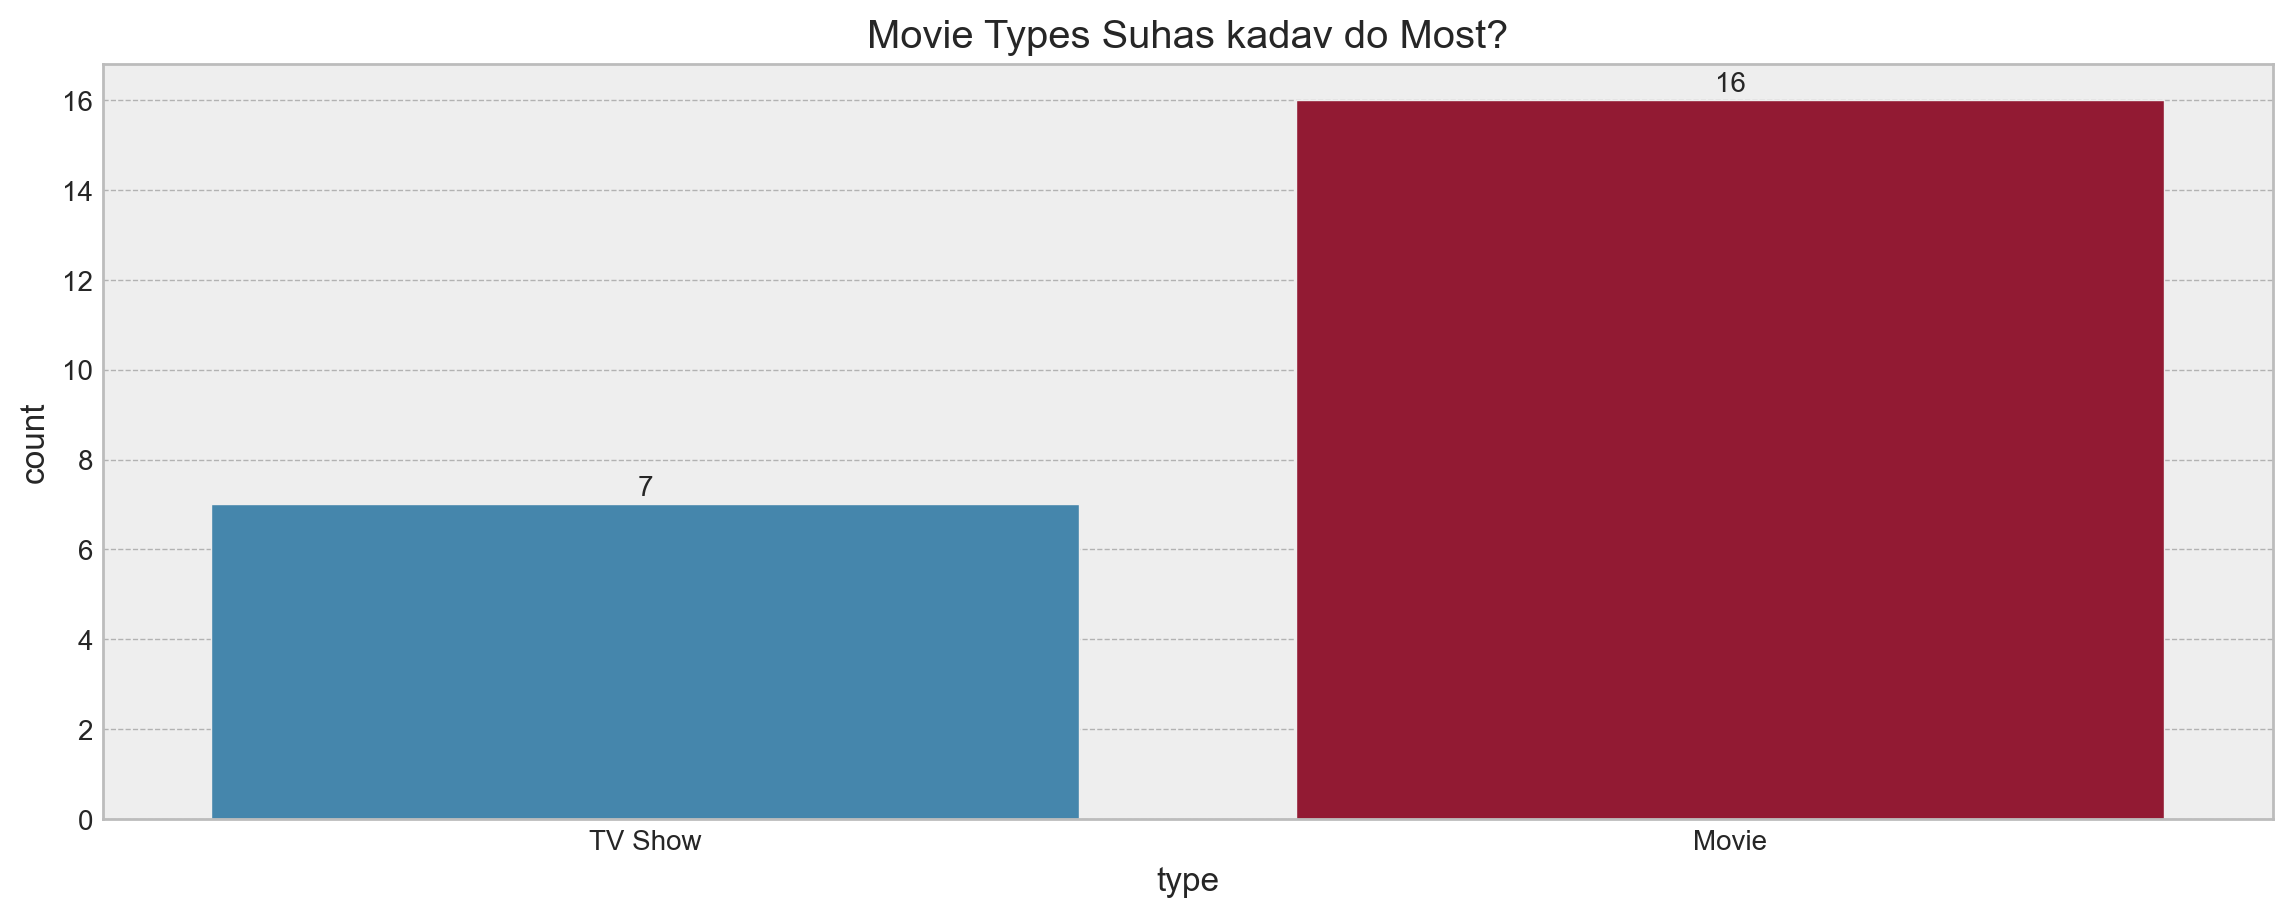

In [43]:
#let check the Type of production SUHAS KADAV do most ?

plt.figure(figsize=(14,5),dpi=200)
fig=sns.countplot(data=suh,x='type')
plt.title('Movie Types Suhas kadav do Most?')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=1)

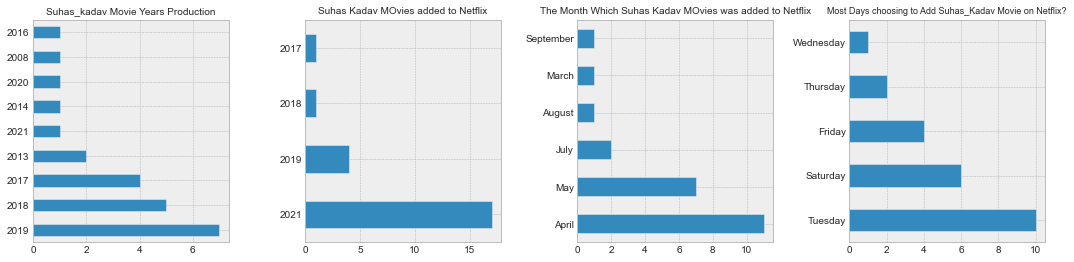

In [45]:
#Now,let check for the SUHAS KaDAV most Years of Released movies and the years it was added to netflix and the rest.?


#SUhas Movies Released Production Year
fig,ax=plt.subplots(1,4,figsize=(10,6))
suh['release_year'].value_counts().plot.barh(figsize=(10,6),ax=ax[0])
ax[0].set_title('Suhas_kadav Movie Years Production',fontsize=10)

#Suhas Movies Years of Addeding to Netflix
suh['Years'].value_counts().plot.barh(figsize=(10,5),ax=ax[1])
ax[1].set_title('Suhas Kadav MOvies added to Netflix',fontsize=10)
fig.tight_layout(pad=1)

#suhas movies month It was added to production
suh['Month_Name'].value_counts().plot.barh(figsize=(10,5),ax=ax[2])
ax[2].set_title('The Month Which Suhas Kadav MOvies was added to Netflix',fontsize=10)
fig.tight_layout(pad=2)

#suhas Movies Added Days in Netflix?
suh['Days_Name'].value_counts().plot.barh(figsize=(15,4),ax=ax[3])
ax[3].set_title('Most Days choosing to Add Suhas_Kadav Movie on Netflix?',fontsize=9)
fig.tight_layout(pad=2)

In [46]:
df.head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,Month_Name,Days_Name,Years
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Firass Dirani, Angie Diaz, Richard Brancatisan...",United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,Saturday,2021
1,s2,TV Show,Blood & Water,Dennie Gordon,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,92 min,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,Friday,2021


In [47]:
df['listed_in'].unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [59]:
#RIGHT HERE AM GOING TO SPLIT THE LISTED COLUMNS 

df[['Action&Documentary','International_Tv_shows&Adventures','Tv_Drama',]]=df['listed_in'].str.split(',',expand=True)

In [60]:
#hHAVING SPLITTED THE LISTED IN COLUMNS LET GO SHALAYE

#FIRST LET VIEW IT

df.sample(3)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,Month_Name,Days_Name,Years,Action&Documentary,International_Tv_shows&Adventures,Tv_Drama
2572,s2573,Movie,Roped,Shaun Paul Piccinino,"Josh Swickard, Casper Van Dien, Lorynn York, C...",United States,2020,PG,90 min,"Children & Family Movies, Dramas, Romantic Movies",A star cowboy in a traveling rodeo gets thrown...,May,Saturday,2020,Children & Family Movies,Dramas,Romantic Movies
4635,s4636,TV Show,Al Hayba,Sam Dunn,"Taim Hasan, Nadine Nassib Njeim, Abdo Chahine,...",Lebanon,2017,TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In a village by the Lebanon-Syria border, the ...",September,Saturday,2018,Crime TV Shows,International TV Shows,TV Dramas
128,s129,Movie,Agatha Christie's Crooked House,Gilles Paquet-Brenner,"Glenn Close, Terence Stamp, Max Irons, Gillian...",United States,2017,PG-13,115 min,"Dramas, International Movies, Thrillers",When a detective investigates the death of his...,September,Wednesday,2021,Dramas,International Movies,Thrillers


In [67]:
#checking on new table, for the purpose of Visualization that is Xlabel we want to rename our columns.


df.rename(columns={'Action&Documentary':'Movie_Category_1'})
df.rename(columns={'International_Tv_shows&Adventures':'Movie_Category_2'})
df.rename(columns={'Tv_Drama':'Movie_category_3'})

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,Month_Name,Days_Name,Years,Action&Documentary,International_Tv_shows&Adventures,Movie_category_3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Firass Dirani, Angie Diaz, Richard Brancatisan...",United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,Saturday,2021,Documentaries,None,None
1,s2,TV Show,Blood & Water,Dennie Gordon,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,92 min,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,Friday,2021,International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,Friday,2021,Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,TV Show,Jailbirds New Orleans,Stephen Frears,BNK48,"United States, United Kingdom",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,Friday,2021,Docuseries,Reality TV,None
4,s5,TV Show,Kota Factory,Robert Luketic,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,92 min,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,Friday,2021,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November,Wednesday,2019,Cult Movies,Dramas,Thrillers
8803,s8804,TV Show,Zombie Dumb,Jean-Claude Flamand-Barny,"Diane Kruger, Martin Freeman, Cas Anvar, Rotem...",Canada,2018,TV-Y7,92 min,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July,Monday,2019,Kids' TV,Korean TV Shows,TV Comedies
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November,Friday,2019,Comedies,Horror Movies,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,Saturday,2020,Children & Family Movies,Comedies,None


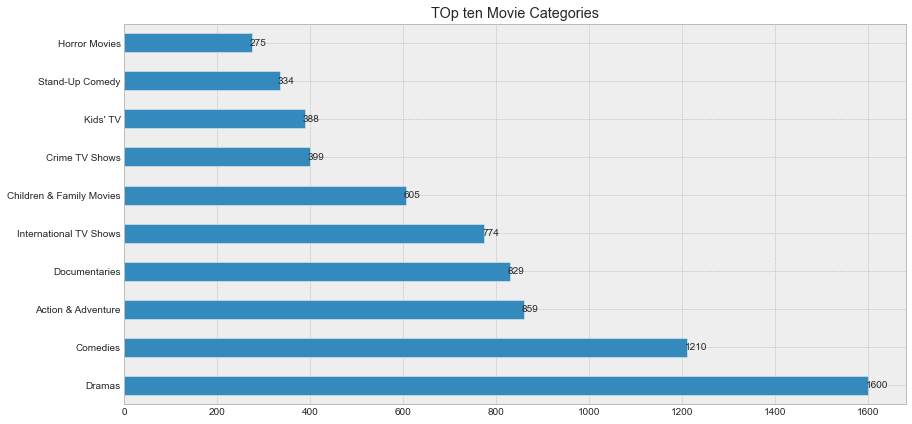

In [73]:
fig=df['Action&Documentary'].value_counts()[:10].plot.barh(figsize=(14,7))
plt.title('TOp ten Movie Categories')
for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-2)

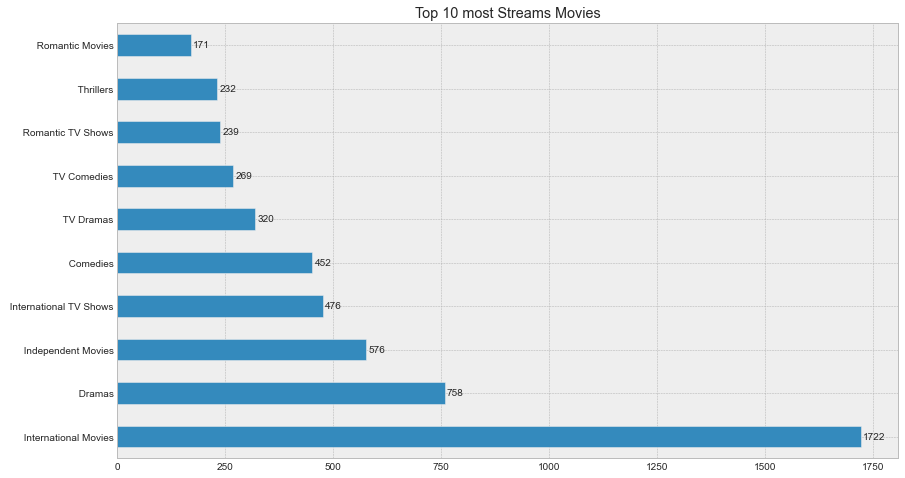

In [76]:
#Plotting for the Movie_Catergories

fig=df['International_Tv_shows&Adventures'].value_counts()[:10].plot.barh(figsize=(14,8))
plt.title('Top 10 most Streams Movies')
for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=2)

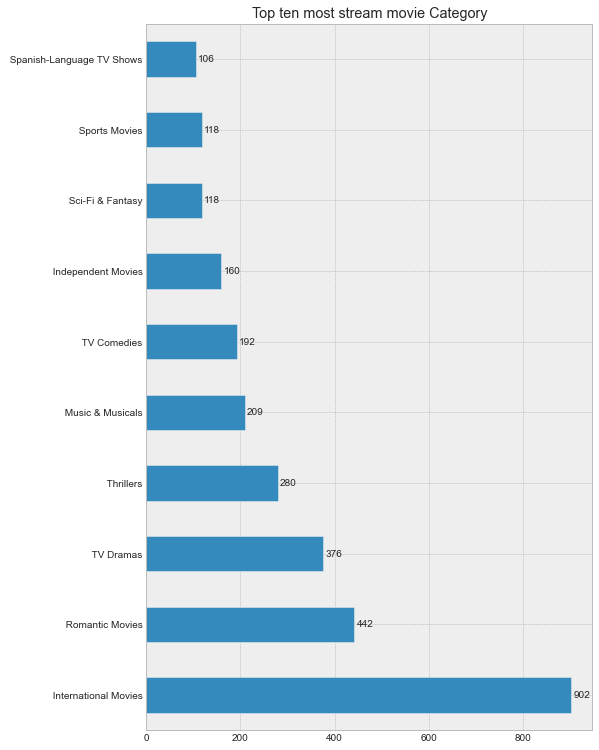

In [79]:

fig=df['Tv_Drama'].value_counts()[:10].plot.barh(figsize=(8,13))
plt.title('Top ten most stream movie Category')
for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=2)

In [ ]:
#INSIGHT

💨MOVIE CATEGORY WAS THE MOST PREFERRED MOVIES PREFER BY THE CUSTUMERS,
💨EXCEPT FROM UNITED STATE, COUNTRY WHO PREFER TVSHOW ARE AUSTRIALIA
💨JULY SEEMS TO BE THE MOST MONTH FOR UPLOADING MOVIE CATEGORY MOVIES AND DECEMBER IS THE MOST UPLOADED TVSHOWS.
💨MOST DIRECTOR MOVIE UPLOAD IS RAJVIC
💨THURSDAY IS THE MOST PREFERRABLE WEEKS DIRECTOR SUHAS HAS EVER UPLOAD
💨INTERNATIONAL MOVIES IS THE MOST STREAM MOVIES, FOLLOW DRAMA AND THE LIKES OF IT.

END OF THE STRIP 
MAY BE IN THE FUTURE I MIGHT COME FOR AMENDMENT🙌😁